# torchattacks demo

In [46]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
from torchvision.utils import save_image
import torchattacks
import os


## Preprocessing

### Load pretraiend model resnet56 from torch.hub

In [47]:
# Here is the selection: Loading from Github or local source.
#model = torch.hub.load("pytorch/vision:v0.13.0", "vgg16_bn", pretrained=True)
model=torchvision.models.vgg19(pretrained=True)

c:\Users\19401\anaconda3\envs\PRP\lib\site-packages\torchvision\models\_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
c:\Users\19401\anaconda3\envs\PRP\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


### Load dataset from imagenet

In [48]:
use_cuda = True
transform = transforms.Compose(
    [transforms.Resize((256, 256)),
     transforms.ToTensor(),
])

testset = torchvision.datasets.ImageFolder(root='../../../imagenet2012/',
                                       transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


org_img = []
org_labels = []
tmp=0
with torch.no_grad():
    if (tmp<=60):
        for data in testloader:
                images, labels = data
                org_img.append(images)
                org_labels.append(labels)
                tmp+=1


In [49]:
print(len(testloader))

782


### Test accuracy of the model

In [50]:
def test_acc_new(model, testloader, test_images, n_image, save_test_images = False):
    correct = 0
    total = 0
    p_labels = []
    saved_img = []
    i = 0
    times=0
    
    for data in testloader:
        images, labels = data
        #print(labels)
        print(len(test_images))
        if total < n_image:
            outputs = model(test_images[i])
            _, predicted = torch.max(outputs.data, 1)
            #print(predicted)

            for j in labels:
                # p_labels.append(predicted)
                if save_test_images and total % 4 == 0:
                    saved_img.append(test_images[total])
                    print("total="+total)
                    
                p_labels.append(predicted)
                if predicted[total%64] == j:
                    correct += 1
                total += 1
            i += 1
            times+=1
        else:
            break
    test_accuracy = (100.0 * correct / total)
    print('Accuracy of the network on the', total, "images is: ", test_accuracy, '%')
    if save_test_images == True:
        return test_accuracy, p_labels, saved_img
    else:
        return test_accuracy, p_labels

In [51]:
#test_accuracy, resnet56_labels = test_acc_new(model, testloader, org_img, st, False)

In [52]:
# acc_label=[]
# for i in org_labels:
#     for j in i:
#         acc_label.append(j)
# temp=0
# acc=0
# for i in resnet56_labels:
#     for j in i:
#         if acc_label[temp]==j :
#             acc+=1

#         temp+=1

# total_acc=acc/len(acc_label)
# print(acc)
# print(len(acc_label))
# print(total_acc)

## Attack

### Tool functions

### Implement torchattacks.FGSM

In [53]:
test_loader_1=torch.utils.data.DataLoader(testset,batch_size=1,shuffle=True)
epsilons = []
init_eps = 0
accuracies=[]
step = 0.001
n_step = 5


In [54]:
epsilons=[0.001]

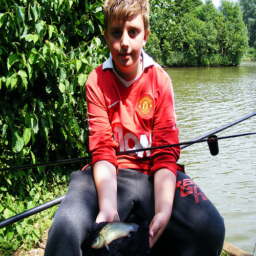

In [55]:
transforms.ToPILImage()(org_img[0][2])

In [56]:
print(org_img[0][2])

tensor([[[0.0667, 0.0980, 0.0706,  ..., 0.3843, 0.3647, 0.3333],
         [0.0863, 0.0824, 0.0431,  ..., 0.3255, 0.2902, 0.2667],
         [0.0941, 0.0863, 0.0431,  ..., 0.3765, 0.2510, 0.2392],
         ...,
         [0.4000, 0.2118, 0.1882,  ..., 0.5686, 0.6980, 0.6980],
         [0.4118, 0.2941, 0.3137,  ..., 0.5922, 0.7020, 0.6902],
         [0.4314, 0.3686, 0.3725,  ..., 0.5373, 0.6745, 0.6824]],

        [[0.2078, 0.2431, 0.1804,  ..., 0.5020, 0.4902, 0.4510],
         [0.2196, 0.2118, 0.1294,  ..., 0.4392, 0.4196, 0.3882],
         [0.2431, 0.2078, 0.1333,  ..., 0.4784, 0.3608, 0.3490],
         ...,
         [0.3451, 0.2235, 0.1922,  ..., 0.6196, 0.7490, 0.7451],
         [0.3804, 0.3059, 0.3686,  ..., 0.6510, 0.7608, 0.7490],
         [0.4706, 0.4510, 0.4392,  ..., 0.6039, 0.7451, 0.7490]],

        [[0.0314, 0.0353, 0.0431,  ..., 0.4275, 0.4118, 0.3647],
         [0.0275, 0.0392, 0.0431,  ..., 0.3765, 0.3294, 0.3098],
         [0.0510, 0.0510, 0.0314,  ..., 0.4980, 0.3255, 0.

In [72]:
from torchvision import models
from torchattacks import BIM
model = models.resnet18(pretrained=True).to(device).eval()
atk = BIM(model,8/255)

c:\Users\19401\anaconda3\envs\PRP\lib\site-packages\torchvision\models\_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
c:\Users\19401\anaconda3\envs\PRP\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [74]:
atk_img=[]
#for i in range(len(org_img)):
for i in range(10):
    tmp=atk(org_img[i], org_labels[i])
    atk_img.append(tmp)

RuntimeError: [enforce fail at C:\b\abs_bao0hdcrdh\croot\pytorch_1675190257512\work\c10\core\impl\alloc_cpu.cpp:81] data. DefaultCPUAllocator: not enough memory: you tried to allocate 268435456 bytes.

In [59]:
fin_img=atk_img[0][2]

Here:after attack it turn to be 0000?

In [60]:
print(fin_img)

tensor([[[0.0980, 0.1294, 0.0392,  ..., 0.3790, 0.3953, 0.3647],
         [0.1176, 0.1137, 0.0275,  ..., 0.3333, 0.3216, 0.2916],
         [0.1176, 0.0706, 0.0745,  ..., 0.3451, 0.2824, 0.2706],
         ...,
         [0.3686, 0.1804, 0.1897,  ..., 0.6000, 0.6667, 0.6766],
         [0.3804, 0.2719, 0.3190,  ..., 0.6235, 0.7025, 0.6902],
         [0.4392, 0.3608, 0.3647,  ..., 0.5686, 0.6431, 0.7137]],

        [[0.2245, 0.2588, 0.1490,  ..., 0.5303, 0.5216, 0.4824],
         [0.2157, 0.2353, 0.1137,  ..., 0.4627, 0.4316, 0.4196],
         [0.2700, 0.1765, 0.1490,  ..., 0.4826, 0.3843, 0.3804],
         ...,
         [0.3765, 0.2392, 0.2042,  ..., 0.6408, 0.7176, 0.7137],
         [0.3854, 0.2980, 0.3373,  ..., 0.6520, 0.7451, 0.7804],
         [0.4472, 0.4240, 0.4078,  ..., 0.5804, 0.7137, 0.7804]],

        [[0.0000, 0.0431, 0.0118,  ..., 0.4039, 0.4078, 0.3569],
         [0.0000, 0.0549, 0.0196,  ..., 0.3843, 0.3453, 0.3248],
         [0.0785, 0.0196, 0.0545,  ..., 0.4667, 0.3312, 0.

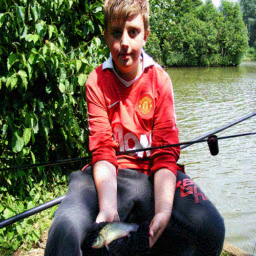

In [61]:
transforms.ToPILImage()(fin_img)

### Conclusion

In [62]:
# id=0
# for i in range(700):
#     dir_name=os.getcwd()+'\\ORG_img\\'
#     #os.mkdir(dir_name)
#     for j in range(len(org_img[i])):
#         #tmp_img=transforms.ToPILImage()(unnormalize(fgsm_img_tmp[i][j]))
#         save_image((org_img[i][j]),dir_name+'%i.png'%(id,))
#         id+=1

Save image

In [64]:
id=0
for i in range(len(atk_img)):
    dir_name=os.getcwd()+'\\PGD_img\\'
    #os.mkdir(dir_name)
    for j in range(len(atk_img[i])):
        #tmp_img=transforms.ToPILImage()(unnormalize(fgsm_img_tmp[i][j]))
        save_image((atk_img[i][j]),dir_name+'%i.png'%(id,))
        id+=1